In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [48]:
data = pd.read_csv(r'E:\Info_Srping\FWI_Prediction\Data\processed\train_data.csv')
data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,2019-08-27 12:00:00,12.0,7.6,74.4,12.0,0,1015.13,30.0,2.6,0,...,6.9,51.1,10.3,0.9,0.6,0.0,United Kingdom,54.502224,-2.68500,252.0
1,2018-06-06 12:00:00,11.1,1.7,52.0,22.1,200,1010.80,38.6,1.5,0,...,14.8,104.2,21.9,1.7,2.7,0.2,Canada,55.200000,-119.40000,745.0
2,2014-10-11 12:00:00,2.9,2.3,95.0,1.9,250,1018.19,27.7,0.0,2,...,3.1,330.1,6.1,0.1,0.0,0.0,Canada,49.820000,-74.98000,381.1
3,2015-09-11 12:00:00,22.1,11.1,49.8,9.5,267,1015.79,23.9,0.0,4,...,11.4,282.9,20.7,3.8,6.3,0.7,Canada,54.280000,-111.45000,619.0
4,2016-06-22 12:00:00,17.0,10.0,63.6,35.2,260,1016.70,16.1,0.0,1,...,107.4,482.9,138.1,15.6,47.7,25.4,United States,37.618805,-122.37542,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183935,2012-09-19 12:00:00,22.5,15.4,63.0,35.2,180,1016.90,10.1,0.0,2,...,11.5,27.6,11.5,16.9,16.3,3.8,Canada,45.230000,-63.06000,23.5
1183936,2011-08-01 12:00:00,17.4,12.1,70.0,22.2,300,1018.30,49.7,0.0,10,...,20.6,334.2,35.6,6.1,12.8,2.5,Canada,49.350000,-124.16000,14.5
1183937,2017-07-09 12:00:00,21.0,15.0,68.7,13.0,200,1014.50,14.5,0.0,1,...,5.2,107.5,9.3,2.1,1.8,0.1,Canada,43.628613,-79.39500,76.8
1183938,2010-04-24 12:00:00,16.2,-1.4,31.0,25.9,220,1016.50,48.3,0.0,3,...,12.1,21.5,12.0,15.3,15.4,3.4,Canada,45.466667,-73.75000,36.0


In [49]:
train_data = data.iloc[:20000]       
train_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,2019-08-27 12:00:00,12.0,7.6,74.4,12.0,0,1015.13,30.0,2.60,0,...,6.9,51.1,10.3,0.9,0.6,0.0,United Kingdom,54.502224,-2.68500,252.0
1,2018-06-06 12:00:00,11.1,1.7,52.0,22.1,200,1010.80,38.6,1.50,0,...,14.8,104.2,21.9,1.7,2.7,0.2,Canada,55.200000,-119.40000,745.0
2,2014-10-11 12:00:00,2.9,2.3,95.0,1.9,250,1018.19,27.7,0.00,2,...,3.1,330.1,6.1,0.1,0.0,0.0,Canada,49.820000,-74.98000,381.1
3,2015-09-11 12:00:00,22.1,11.1,49.8,9.5,267,1015.79,23.9,0.00,4,...,11.4,282.9,20.7,3.8,6.3,0.7,Canada,54.280000,-111.45000,619.0
4,2016-06-22 12:00:00,17.0,10.0,63.6,35.2,260,1016.70,16.1,0.00,1,...,107.4,482.9,138.1,15.6,47.7,25.4,United States,37.618805,-122.37542,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2018-12-25 12:00:00,15.0,2.0,41.7,16.7,350,1016.50,16.1,22.10,0,...,1.1,19.1,1.9,0.4,0.1,0.0,United States,40.508972,-122.29339,153.9
19996,2015-11-28 12:00:00,-3.8,-12.0,54.2,6.4,241,1027.78,28.3,0.34,0,...,39.4,318.2,60.2,1.4,4.8,0.4,Canada,51.780000,-112.25000,845.0
19997,2018-09-14 12:00:00,4.5,-1.4,65.0,16.5,112,1024.23,23.2,0.00,5,...,71.0,748.1,114.7,4.2,18.4,4.7,Canada,50.300000,-112.86000,955.0
19998,2019-09-09 12:00:00,15.6,6.1,53.4,14.8,170,1022.70,24.0,0.00,2,...,3.6,80.0,6.4,2.7,2.0,0.1,Canada,50.116665,-91.90000,383.1


In [50]:
train_data = train_data.drop(['wind_direction','snow_on_ground','daily_severity_rating','latitude','longitude', 'elevation','visibility'], axis = 1)
train_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,country
0,2019-08-27 12:00:00,12.0,7.6,74.4,12.0,1015.13,2.60,0,64.1,6.9,51.1,10.3,0.9,0.6,United Kingdom
1,2018-06-06 12:00:00,11.1,1.7,52.0,22.1,1010.80,1.50,0,66.2,14.8,104.2,21.9,1.7,2.7,Canada
2,2014-10-11 12:00:00,2.9,2.3,95.0,1.9,1018.19,0.00,2,44.3,3.1,330.1,6.1,0.1,0.0,Canada
3,2015-09-11 12:00:00,22.1,11.1,49.8,9.5,1015.79,0.00,4,85.8,11.4,282.9,20.7,3.8,6.3,Canada
4,2016-06-22 12:00:00,17.0,10.0,63.6,35.2,1016.70,0.00,1,86.6,107.4,482.9,138.1,15.6,47.7,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2018-12-25 12:00:00,15.0,2.0,41.7,16.7,1016.50,22.10,0,49.9,1.1,19.1,1.9,0.4,0.1,United States
19996,2015-11-28 12:00:00,-3.8,-12.0,54.2,6.4,1027.78,0.34,0,78.9,39.4,318.2,60.2,1.4,4.8,Canada
19997,2018-09-14 12:00:00,4.5,-1.4,65.0,16.5,1024.23,0.00,5,84.0,71.0,748.1,114.7,4.2,18.4,Canada
19998,2019-09-09 12:00:00,15.6,6.1,53.4,14.8,1022.70,0.00,2,81.1,3.6,80.0,6.4,2.7,2.0,Canada


In [51]:
# Load saved PowerTransformer dictionary
with open(r'E:\Info_Srping\FWI_Prediction\models\Final_pkl_files\power_transformers.pkl', 'rb') as f:
    power_transformers = pickle.load(f)

# Load saved StandardScaler
with open(r'E:\Info_Srping\FWI_Prediction\models\Final_pkl_files\standard_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Load saved OneHotEncoding
with open(r'E:\Info_Srping\FWI_Prediction\models\Final_pkl_files\one_hot_encoder.pkl', 'rb') as f:
    ohe = pickle.load(f)


In [52]:
col = ['fine_fuel_moisture_code','duff_moisture_code', 'drought_code','build_up_index', 'initial_spread_index','fire_weather_index','wind_speed']
for col, pt in power_transformers.items():
    # Transform test column using fitted transformer
    transformed = pt.transform(train_data[col].values.reshape(-1, 1))
    train_data[col + '_transformed'] = transformed.flatten()


In [53]:
numeric_cols = train_data.select_dtypes(include=['float64', 'int']).columns
train_data[numeric_cols] = scaler.transform(train_data[numeric_cols])

In [26]:
train_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,2019-08-27 12:00:00,-0.594522,0.046346,0.762831,-0.321539,0.078602,0.011661,-0.542337,-0.458485,-0.487799,...,-0.436848,-0.663647,United Kingdom,-0.803750,-0.581596,-0.969009,-0.611173,-0.811095,-1.025303,-0.169244
1,2018-06-06 12:00:00,-0.708704,-0.756624,-0.292205,0.744810,-0.505897,-0.139434,-0.542337,-0.357091,-0.304750,...,-0.359229,-0.531311,Canada,-0.696235,-0.010055,-0.523163,-0.048529,-0.394738,-0.339540,0.837352
2,2014-10-11 12:00:00,-1.749029,-0.674966,1.733088,-1.387889,0.491666,-0.345472,-0.109146,-1.414482,-0.575847,...,-0.514468,-0.701457,Canada,-1.558656,-1.095775,0.588132,-0.951194,-1.499837,-1.419568,-1.877864
3,2015-09-11 12:00:00,0.686853,0.522685,-0.395825,-0.585487,0.167695,-0.345472,0.324045,0.589249,-0.383531,...,-0.155478,-0.304450,Canada,0.599011,-0.213236,0.403706,-0.093457,0.245171,0.200312,-0.484374
4,2016-06-22 12:00:00,0.039822,0.372979,0.254153,2.127898,0.290534,-0.345472,-0.325741,0.627875,1.840854,...,0.989406,2.304456,United States,0.663822,1.742717,1.101788,1.678844,1.464922,1.635272,1.816022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2018-12-25 12:00:00,-0.213916,-0.715795,-0.777334,0.174683,0.263536,2.690159,-0.542337,-1.144099,-0.622188,...,-0.485360,-0.695156,United States,-1.389689,-1.594914,-1.386612,-1.545249,-1.189566,-1.339039,0.340236
19996,2015-11-28 12:00:00,-2.599050,-2.621149,-0.188586,-0.912783,1.786204,-0.298770,-0.542337,0.256098,0.265248,...,-0.388336,-0.398976,Canada,0.080252,0.812881,0.543074,0.836654,-0.532068,0.019158,-0.942185
19997,2018-09-14 12:00:00,-1.546039,-1.178524,0.320093,0.153567,1.306996,-0.345472,0.540641,0.502340,0.997441,...,-0.116669,0.458056,Canada,0.456777,1.348900,1.813121,1.481110,0.330265,0.952431,0.320257
19998,2019-09-09 12:00:00,-0.137795,-0.157799,-0.226265,-0.025918,1.100464,-0.345472,-0.109146,0.362320,-0.564262,...,-0.262205,-0.575423,Canada,0.237935,-1.007381,-0.705710,-0.921832,-0.038073,-0.509023,0.144893


In [54]:
train_data = train_data[['temperature', 'dew_point_temperature', 'relative_humidity',
        'atmospheric_pressure', 'precipitation', 'rain_days',
       'country', 'fine_fuel_moisture_code_transformed',
       'duff_moisture_code_transformed', 'drought_code_transformed',
       'build_up_index_transformed', 'initial_spread_index_transformed',
       'fire_weather_index_transformed', 'wind_speed_transformed']]

In [55]:
train_data['FFMC__TEMP'] = train_data['temperature'] * train_data['fine_fuel_moisture_code_transformed']
train_data['FFMC_RH'] = train_data['relative_humidity'] * train_data['fine_fuel_moisture_code_transformed']
train_data['RH_TEMP'] = train_data['temperature'] * train_data['relative_humidity']
train_data['RD_FFMC'] =  train_data['fine_fuel_moisture_code_transformed'] * train_data['rain_days']
train_data['DC_RD'] =  train_data['drought_code_transformed'] * train_data['rain_days']
train_data['WS_TENP'] =  train_data['wind_speed_transformed'] * train_data['fine_fuel_moisture_code_transformed']
train_data['IST_WS'] =  train_data['wind_speed_transformed'] * train_data['initial_spread_index_transformed']
train_data['ISI_FFMC'] =  train_data['initial_spread_index_transformed'] * train_data['fine_fuel_moisture_code_transformed']
train_data['ISI_RH'] =  train_data['initial_spread_index_transformed'] * train_data['relative_humidity']
train_data['DMC_TEMP'] =  train_data['duff_moisture_code_transformed'] * train_data['temperature']
train_data['DMC_RD'] =  train_data['duff_moisture_code_transformed'] * train_data['rain_days']
train_data['RD_TEMP'] =  train_data['rain_days'] * train_data['temperature']
train_data['DMC_DC'] =  train_data['drought_code_transformed'] * train_data['duff_moisture_code_transformed']
train_data['BUI_DC'] =  train_data['drought_code_transformed'] * train_data['build_up_index_transformed']
train_data['BUI_DMC'] =  train_data['duff_moisture_code_transformed'] * train_data['build_up_index_transformed']


C:\Users\DELL\AppData\Local\Temp\ipykernel_7996\3130478353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['FFMC__TEMP'] = train_data['temperature'] * train_data['fine_fuel_moisture_code_transformed']
C:\Users\DELL\AppData\Local\Temp\ipykernel_7996\3130478353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['FFMC_RH'] = train_data['relative_humidity'] * train_data['fine_fuel_moisture_code_transformed']
C:\Users\DELL\AppData\Local\Temp\ipykernel_7996\3130478353.py:3: SettingWithC

In [56]:
train_data

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,...,WS_TENP,IST_WS,ISI_FFMC,ISI_RH,DMC_TEMP,DMC_RD,RD_TEMP,DMC_DC,BUI_DC,BUI_DMC
0,-0.594522,0.046346,0.762831,0.078602,0.011661,-0.542337,United Kingdom,-0.803750,-0.581596,-0.969009,...,0.136030,0.137273,0.651918,-0.618729,0.345772,0.315421,0.322431,0.563571,0.592232,0.355456
1,-0.708704,-0.756624,-0.292205,-0.505897,-0.139434,-0.542337,Canada,-0.696235,-0.010055,-0.523163,...,-0.582993,-0.330535,0.274830,0.115345,0.007126,0.005453,0.384356,0.005260,0.025389,0.000488
2,-1.749029,-0.674966,1.733088,0.491666,-0.345472,-0.109146,Canada,-1.558656,-1.095775,0.588132,...,2.926943,2.816489,2.337729,-2.599349,1.916542,0.119599,0.190899,-0.644460,-0.559428,1.042295
3,0.686853,0.522685,-0.395825,0.167695,-0.345472,0.324045,Canada,0.599011,-0.213236,0.403706,...,-0.290145,-0.118755,0.146860,-0.097045,-0.146462,-0.069098,0.222572,-0.086085,-0.037729,0.019928
4,0.039822,0.372979,0.254153,0.290534,-0.345472,-0.325741,United States,0.663822,1.742717,1.101788,...,1.205516,2.660331,0.972448,0.372314,0.069398,-0.567675,-0.012972,1.920105,1.849730,2.925750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.213916,-0.715795,-0.777334,0.263536,2.690159,-0.542337,United States,-1.389689,-1.594914,-1.386612,...,-0.472822,-0.404733,1.653127,0.924690,0.341177,0.864981,0.116014,2.211527,2.142661,2.464538
19996,-2.599050,-2.621149,-0.188586,1.786204,-0.298770,-0.542337,Canada,0.080252,0.812881,0.543074,...,-0.075612,0.501307,-0.042699,0.100340,-2.112717,-0.440855,1.409561,0.441454,0.454365,0.680100
19997,-1.546039,-1.178524,0.320093,1.306996,-0.345472,0.540641,Canada,0.456777,1.348900,1.813121,...,0.146286,0.105770,0.150857,0.105715,-2.085452,0.729271,-0.835852,2.445720,2.685432,1.997870
19998,-0.137795,-0.157799,-0.226265,1.100464,-0.345472,-0.109146,Canada,0.237935,-1.007381,-0.705710,...,0.034475,-0.005517,-0.009059,0.008615,0.138812,0.109951,0.015040,0.710919,0.650546,0.928636


In [57]:
encoded_array = ohe.transform(train_data[['country']])  
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(['country']))
new_data_encoded = pd.concat([train_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


In [58]:
new_data_encoded = new_data_encoded.drop(['country'], axis =1)
new_data_encoded

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,...,DMC_RD,RD_TEMP,DMC_DC,BUI_DC,BUI_DMC,country_Canada,country_France,country_Spain,country_United Kingdom,country_United States
0,-0.594522,0.046346,0.762831,0.078602,0.011661,-0.542337,-0.803750,-0.581596,-0.969009,-0.611173,...,0.315421,0.322431,0.563571,0.592232,0.355456,0,0,0,1,0
1,-0.708704,-0.756624,-0.292205,-0.505897,-0.139434,-0.542337,-0.696235,-0.010055,-0.523163,-0.048529,...,0.005453,0.384356,0.005260,0.025389,0.000488,1,0,0,0,0
2,-1.749029,-0.674966,1.733088,0.491666,-0.345472,-0.109146,-1.558656,-1.095775,0.588132,-0.951194,...,0.119599,0.190899,-0.644460,-0.559428,1.042295,1,0,0,0,0
3,0.686853,0.522685,-0.395825,0.167695,-0.345472,0.324045,0.599011,-0.213236,0.403706,-0.093457,...,-0.069098,0.222572,-0.086085,-0.037729,0.019928,1,0,0,0,0
4,0.039822,0.372979,0.254153,0.290534,-0.345472,-0.325741,0.663822,1.742717,1.101788,1.678844,...,-0.567675,-0.012972,1.920105,1.849730,2.925750,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.213916,-0.715795,-0.777334,0.263536,2.690159,-0.542337,-1.389689,-1.594914,-1.386612,-1.545249,...,0.864981,0.116014,2.211527,2.142661,2.464538,0,0,0,0,1
19996,-2.599050,-2.621149,-0.188586,1.786204,-0.298770,-0.542337,0.080252,0.812881,0.543074,0.836654,...,-0.440855,1.409561,0.441454,0.454365,0.680100,1,0,0,0,0
19997,-1.546039,-1.178524,0.320093,1.306996,-0.345472,0.540641,0.456777,1.348900,1.813121,1.481110,...,0.729271,-0.835852,2.445720,2.685432,1.997870,1,0,0,0,0
19998,-0.137795,-0.157799,-0.226265,1.100464,-0.345472,-0.109146,0.237935,-1.007381,-0.705710,-0.921832,...,0.109951,0.015040,0.710919,0.650546,0.928636,1,0,0,0,0


In [44]:
new_data_encoded

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,...,BUI_DC,BUI_DMC,BUI_SQRT,FFMC_SQRT,ISI_SQRT,country_Canada,country_France,country_Spain,country_United Kingdom,country_United States
0,-0.594522,0.046346,0.762831,0.078602,0.011661,-0.542337,-0.803750,-0.581596,-0.969009,-0.611173,...,0.592232,0.355456,NaN,NaN,NaN,0,0,0,1,0
1,-0.708704,-0.756624,-0.292205,-0.505897,-0.139434,-0.542337,-0.696235,-0.010055,-0.523163,-0.048529,...,0.025389,0.000488,NaN,NaN,NaN,1,0,0,0,0
2,-1.749029,-0.674966,1.733088,0.491666,-0.345472,-0.109146,-1.558656,-1.095775,0.588132,-0.951194,...,-0.559428,1.042295,NaN,NaN,NaN,1,0,0,0,0
3,0.686853,0.522685,-0.395825,0.167695,-0.345472,0.324045,0.599011,-0.213236,0.403706,-0.093457,...,-0.037729,0.019928,NaN,0.773958,0.495148,1,0,0,0,0
4,0.039822,0.372979,0.254153,0.290534,-0.345472,-0.325741,0.663822,1.742717,1.101788,1.678844,...,1.849730,2.925750,1.295702,0.814753,1.210340,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.213916,-0.715795,-0.777334,0.263536,2.690159,-0.542337,-1.389689,-1.594914,-1.386612,-1.545249,...,2.142661,2.464538,NaN,NaN,NaN,0,0,0,0,1
19996,-2.599050,-2.621149,-0.188586,1.786204,-0.298770,-0.542337,0.080252,0.812881,0.543074,0.836654,...,0.454365,0.680100,0.914688,0.283287,NaN,1,0,0,0,0
19997,-1.546039,-1.178524,0.320093,1.306996,-0.345472,0.540641,0.456777,1.348900,1.813121,1.481110,...,2.685432,1.997870,1.217009,0.675853,0.574687,1,0,0,0,0
19998,-0.137795,-0.157799,-0.226265,1.100464,-0.345472,-0.109146,0.237935,-1.007381,-0.705710,-0.921832,...,0.650546,0.928636,NaN,0.487785,NaN,1,0,0,0,0


In [59]:
new_data_encoded['BUI_SQRT'] = (new_data_encoded['build_up_index_transformed'].clip(lower=0)) ** 0.5
new_data_encoded['FFMC_SQRT'] = (new_data_encoded['fine_fuel_moisture_code_transformed'].clip(lower=0)) ** 0.5
new_data_encoded['ISI_SQRT'] = (new_data_encoded['initial_spread_index_transformed'].clip(lower=0)) ** 0.5


In [60]:
# Prepare features and target from your new test data
X = new_data_encoded.drop('fire_weather_index_transformed', axis = 1)
y = new_data_encoded['fire_weather_index_transformed']

In [61]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [62]:
# Save the model
with open(r'linear_regression_V3.pkl', 'wb') as f:
    pickle.dump(model, f)

In [63]:
# Predict on full training data
y_train_pred = model.predict(X)

train_r2 = r2_score(y, y_train_pred)
train_mse = mean_squared_error(y, y_train_pred)

print('R²:', train_r2)
print('MSE:', train_mse)


R²: 0.9827439988085893
MSE: 0.017237908547772615


In [64]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
9,build_up_index_transformed,0.421358
33,FFMC_SQRT,0.414946
10,initial_spread_index_transformed,0.411446
32,BUI_SQRT,0.386135
6,fine_fuel_moisture_code_transformed,0.171974
20,ISI_RH,0.083862
34,ISI_SQRT,0.077018
11,wind_speed_transformed,0.075239
25,BUI_DC,0.067186
12,FFMC__TEMP,0.044746


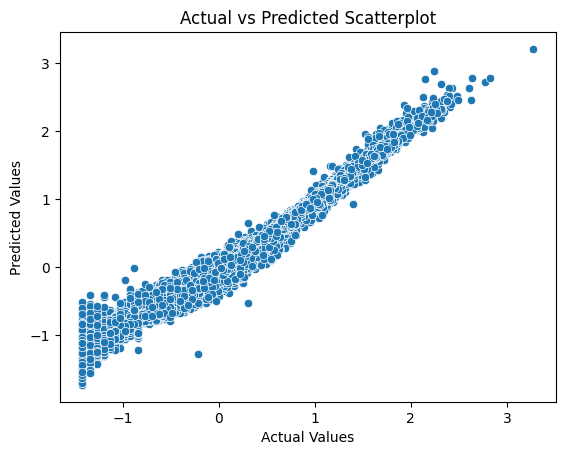

In [65]:
sns.scatterplot(x=y, y=y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Scatterplot')
plt.savefig('Train_Act_vs_pred.png')
plt.show()


In [66]:
import pickle

# Load saved transformers
with open(r'E:\Info_Srping\FWI_Prediction\models\Final_pkl_files\power_transformers.pkl', 'rb') as f:
    power_transformers = pickle.load(f)

with open(r'E:\Info_Srping\FWI_Prediction\models\Final_pkl_files\standard_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [67]:
# number of features scaler was trained on
n_features = len(scaler.mean_)  

# index of target column inside scaler
col_index = list(scaler.feature_names_in_).index('fire_weather_index_transformed')

def inverse_single_column(scaler, values, col_index):
    """
    Inverse transform only one column of a StandardScaler.
    values: (n_samples,) array in scaled space for target column
    col_index: index of target column inside scaler.feature_names_in_
    """
    # create dummy matrix with correct number of features
    dummy = np.zeros((len(values), n_features))
    dummy[:, col_index] = values  # put values only in target column
    
    # inverse transform all features
    inv = scaler.inverse_transform(dummy)
    
    # extract only target column (now back in power-transform space)
    return inv[:, col_index]

In [68]:
# Step 1: inverse StandardScaler
y_train_pred_power = inverse_single_column(scaler, y_train_pred, col_index)
y_train_power = inverse_single_column(scaler, y, col_index)

# Step 2: inverse PowerTransformer
pt = power_transformers['fire_weather_index']
y_train_pred_orig = pt.inverse_transform(y_train_pred_power.reshape(-1, 1)).ravel()
y_train_orig = pt.inverse_transform(y_train_power.reshape(-1, 1)).ravel()

# Step 3: evaluate metrics
from sklearn.metrics import r2_score, mean_squared_error

train_r2_orig = r2_score(y_train_orig, y_train_pred_orig)
train_mse_orig = mean_squared_error(y_train_orig, y_train_pred_orig)

print('Original scale R²:', train_r2_orig)
print('Original scale MSE:', train_mse_orig)

Original scale R²: 0.961853305496436
Original scale MSE: 9.898349738668319


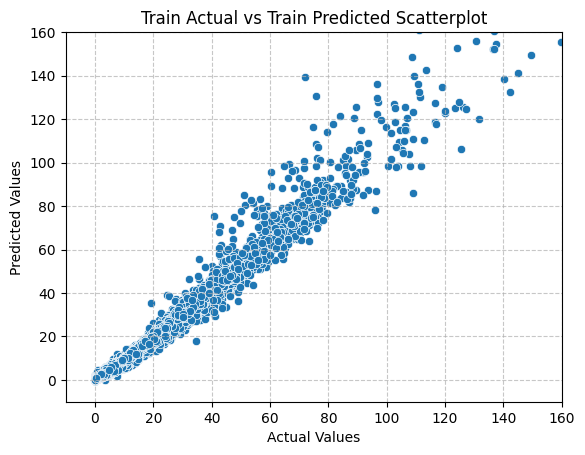

In [69]:
sns.scatterplot(x=y_train_orig, y=y_train_pred_orig)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train Actual vs Train Predicted Scatterplot')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(-10, 160)
plt.xlim(-10, 160)
plt.savefig('train_Act_vs_pred.png')
plt.show()


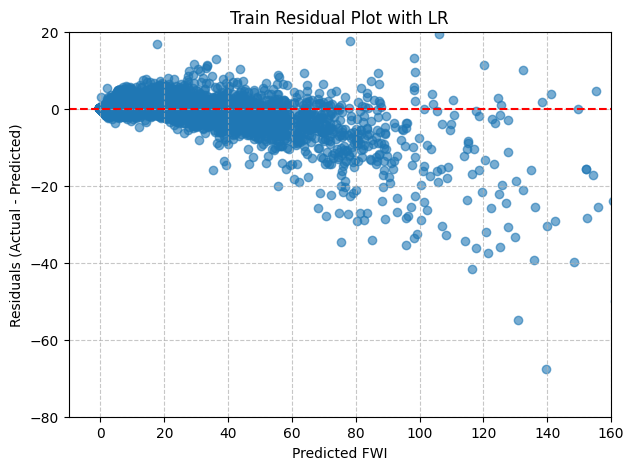

In [70]:
from matplotlib.ticker import MultipleLocator
# Compute residuals
train_residuals = y_train_orig - y_train_pred_orig

# Train residual plot
plt.figure(figsize=(7,5))
plt.scatter(y_train_pred_orig, train_residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted FWI")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Train Residual Plot with LR")
plt.ylim(-80, 20)
plt.xlim(-10, 160)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_locator(MultipleLocator(20))
plt.savefig("LR_Train_Residual_V1_Plot.png")
plt.show()
